In [9]:
import pandas as pd
import numpy as np
import statistics as stat
import random
import seaborn as sn
import matplotlib.pyplot as plt

from math import sqrt, inf

"""
Source: http://archive.ics.uci.edu/ml/datasets/SPECTF+Heart
"""
data = pd.read_csv("SPECTF_test.csv")
data.columns = [a for a in range(45)]
actual_class = data[44]

In [3]:
def dist(obj_1, obj_2, num_attr):
    ret = 0
    for a in range(num_attr):
        ret += (obj_1[a] - obj_2[a]) ** 2
    return sqrt(ret)

def calculate_membership_matrix(data, num_attr, num_clusters, fuzziness_exponent, centroids, membership_matrix, print_steps = False):
    num_data = len(data)
    distance = [[dist(data.iloc[b], centroids[a], num_attr) for b in range(num_data)] for a in range(num_clusters)]
    
    if print_steps:
        print()
        print("DISTANCES:")
        [print(x) for x in distance]
        print()

    for a in range(num_clusters):
        for b in range(num_data):
            sum = 0
            for c in range(num_clusters):
                if distance[a][b] == 0 and distance[c][b] == 0:
                    sum = 1
                    break
                elif distance[c][b] == 0:
                    sum = inf
                    break
                sum += (distance[a][b] / distance[c][b]) ** (2 / (fuzziness_exponent-1))
            membership_matrix[a][b] = 1/sum

def calculate_centroids(data, num_attr, num_clusters, fuzziness_exponent, membership_matrix):
    num_data = len(data)
    new_centroids = [pd.Series([0 for b in range(num_attr)]) for a in range(num_clusters)]

    for a in range(num_clusters):
        sum = 0
        for b in range(num_data):
            new_centroids[a] += (membership_matrix[a][b]**fuzziness_exponent) * data.iloc[b]
            sum += (membership_matrix[a][b]**fuzziness_exponent)
        new_centroids[a] /= sum

    return new_centroids

def fuzzy_c_means(data, num_attr, num_clusters, fuzziness_exponent, print_steps = False):
    num_data = len(data)
    
    centroids = [data.iloc[a] for a in random.sample(range(num_data), num_clusters)]
    membership_matrix = [[1 for b in range(num_data)] for a in range(num_clusters)]

    calculate_membership_matrix(data, num_attr, num_clusters, fuzziness_exponent, centroids, membership_matrix, print_steps)

    if print_steps:
        print()
        print("INITAL CENTROIDS:")
        [print(x) for x in centroids]
        print("-" * 12)
        print("INITIAL MEMBERSHIP MATRIX:")
        [print(x) for x in membership_matrix]
        print()
        print("#" * 20)
        print()

    for a in range(10):
        centroids = calculate_centroids(data, num_attr, num_clusters, fuzziness_exponent, membership_matrix)
        calculate_membership_matrix(data, num_attr, num_clusters, fuzziness_exponent, centroids, membership_matrix, print_steps)

        if print_steps:
            print()
            print("NEW CENTROIDS:")
            [print(x) for x in centroids]
            print("-" * 12)
            print("NEW MEMBERSHIP MATRIX:")
            [print(x) for x in membership_matrix]
            print()
            print("#" * 20)
            print()

    return (membership_matrix, centroids)

In [4]:
guess_cluster = fuzzy_c_means(data[[a for a in range(44)]], 44, 2, 2, True)




DISTANCES:
[214.43413907304966, 166.9820349618485, 88.96628574915331, 54.872579673275794, 64.5832795698701, 53.94441583704471, 53.009433122794285, 81.62720134857007, 52.82991576748916, 38.65229618017538, 95.50916186418976, 54.323107422164284, 50.1398045468867, 38.07886552931954, 53.178943201233324, 31.400636936215164, 44.799553569204235, 35.63705936241092, 39.96248240537617, 75.37240874484509, 42.485291572496, 36.78314831549904, 54.57105459856901, 34.539832078341085, 50.47771785649585, 30.01666203960727, 40.28647415696737, 38.3275357934736, 43.174066289845804, 44.57577817604534, 53.786615435440815, 44.30575583375144, 61.497967446087195, 43.8520238985614, 71.37226352022192, 47.54997371187496, 33.57082066318904, 46.8187996428785, 61.63602842493991, 66.2268827591938, 44.799553569204235, 44.44097208657794, 56.302753041036986, 46.04345773288535, 0.0, 47.286361670147556, 96.55568341635825, 49.71921157862421, 44.710177812216315, 32.43454948045371, 58.51495535331117, 47.90615826801394, 58.077


DISTANCES:
[209.12130314857444, 163.99826423200426, 82.18365993378227, 44.01081713498807, 61.085069354485796, 48.90204103413434, 43.71388756494052, 79.68041197475945, 43.1689036943572, 30.696476276174717, 96.85521937048875, 48.30420711255372, 41.230515005944596, 28.422685982739324, 46.83698495522005, 30.709668983743853, 39.04953211685105, 26.862421569058267, 32.36375348380279, 67.80711380074072, 34.18165046042442, 33.67914012153906, 47.49882141984511, 32.11315461300232, 36.35323605637513, 21.609933899767388, 34.16395757116238, 35.44455869968533, 34.308443659441004, 29.296072028064636, 44.56368003099727, 35.39779425557582, 57.0433415037245, 34.586735358672684, 60.81400340074155, 34.60663075145988, 27.090125507040568, 41.56583996264665, 45.66154258470211, 60.3614913659917, 38.780974506792305, 38.44810007793385, 51.27895407195524, 37.834447654146224, 25.032641378541694, 39.279203166448575, 88.1625991127522, 40.496119248165506, 37.7115002441595, 29.911259950911248, 50.99576995851185, 39.9


DISTANCES:
[211.37501418348234, 166.56389204658512, 84.44733286845276, 44.64911742887315, 61.72467538100164, 50.73774881389426, 43.99082035887016, 81.95993969321066, 44.06558419842547, 30.29152008460424, 99.07778275065482, 47.536273876010824, 40.13899156495286, 29.232132946459046, 47.51529861894065, 28.947620528191617, 39.001014296214244, 26.821901110624836, 32.38336823251606, 67.1501938031299, 32.851393915335464, 34.37971863384681, 47.35067505248314, 30.730888326940562, 34.798352838947416, 21.397313154711124, 33.85425637182149, 33.38925293117663, 32.24808131465524, 28.962285640659875, 44.17071380117277, 33.94736087764836, 59.08437671513544, 34.328317354686384, 62.49331805436444, 33.72170267496643, 26.05175648269771, 42.20964051519881, 45.97080210236369, 62.44656549158826, 40.15332934382186, 36.695804370686844, 50.71900029458926, 37.4994842839319, 25.049274842486458, 40.20959950414693, 90.20484851847938, 40.511594258486824, 37.11628096429614, 29.174053850620833, 50.331633431233584, 39


DISTANCES:
[212.69927453045275, 168.12799398138077, 85.96210997055466, 44.9720965689154, 62.25896779909949, 52.02474504232941, 44.356441987287255, 83.56071960689057, 44.80268065066909, 30.259344533349857, 100.63669945552833, 46.86034157843204, 39.35100107742849, 29.911895087276072, 48.02257960355142, 27.96009736207287, 39.09760985183169, 26.98991331755954, 32.55793983975726, 66.54804087101645, 32.268696041091935, 35.16347047263981, 47.19010979162969, 29.90287307894777, 33.727127640871686, 21.61413853094592, 33.94391535960813, 32.14743744066925, 30.855923475434317, 29.043046283484802, 43.70546545188098, 33.05565794584198, 60.68446289551499, 34.10649154960265, 63.761137928371305, 33.173174501092596, 25.649457668607816, 42.75357679785161, 46.300048067942235, 63.939530917653904, 41.32046345878099, 35.67206690528901, 50.47494371709762, 37.45724467932079, 25.204757794860644, 40.790693880790066, 91.5964939418018, 40.57642026344015, 36.73500123091104, 28.75039797467411, 49.737391954746585, 38


DISTANCES:
[213.27336587105964, 168.83504441866987, 86.67046395695924, 45.10165877998532, 62.61138184637169, 52.721674814530736, 44.64741371060621, 84.36526858814894, 45.262016988198056, 30.30014750552472, 101.43116944181074, 46.399151800230996, 38.88381176321383, 30.303144665310082, 48.304406077791626, 27.578199070747857, 39.19811558714452, 27.177405069117718, 32.724516076994405, 66.20344262159749, 32.135126376114144, 35.71349832267021, 47.04439164885819, 29.50606902384706, 33.113102120825474, 21.846824567161132, 34.09326243609477, 31.572548943821417, 30.143916998808763, 29.156624605009323, 43.36919731337466, 32.60467363602165, 61.572002054759565, 33.96338803422854, 64.49780676954813, 32.902883188053714, 25.583645617792477, 43.08243812279474, 46.531772068057265, 64.7445087930858, 42.00570442760573, 35.25470691270971, 50.410498584295105, 37.54522483698835, 25.356905422149307, 41.0137132939597, 92.2971978083237, 40.62645762663801, 36.51025397833326, 28.568824559750972, 49.2910811525618


DISTANCES:
[213.4003072607541, 169.01631225453346, 86.86471190756367, 45.117063356990656, 62.79890681534391, 52.9891122662215, 44.81509945297905, 84.62643908707778, 45.481766795993444, 30.317088468142362, 101.70421757047447, 46.1353780311745, 38.6517676187896, 30.46414988049281, 48.412172416884594, 27.521013674124937, 39.260792254055296, 27.292546545238444, 32.826330693391455, 66.0483833796181, 32.19377817363496, 35.99498143479472, 46.928892472979165, 29.36171303603923, 32.819787097483626, 21.969518841728686, 34.20384049405325, 31.39387379220724, 29.885729262499478, 29.2138890808549, 43.163160521572145, 32.41738678513821, 61.93114911240987, 33.8676681625135, 64.83180145436704, 32.78848111485164, 25.63888076066864, 43.229195048207586, 46.6556018385991, 65.05536489096596, 42.307991998257464, 35.18181340403675, 50.416624870717484, 37.65462083311633, 25.432022045292868, 41.02340440219015, 92.53727006034302, 40.644936858435, 36.38811295230755, 28.49124780629092, 49.00303956035203, 38.52566


DISTANCES:
[213.27169540819827, 168.89930735936463, 86.77292321874812, 45.05629886569888, 62.86695264209403, 52.98699198936015, 44.882166001426356, 84.57322769578892, 45.53136211649334, 30.314607515402606, 101.67423434931881, 46.0029079065512, 38.57028339825245, 30.475071671865958, 48.40390695182744, 27.633178812521006, 39.290288139557454, 27.334578652646183, 32.87254675684175, 65.9960893629851, 32.33023563674523, 36.091934551251555, 46.83640187292875, 29.364013295517083, 32.7257345813526, 22.00501614808062, 34.27729457314311, 31.446428034069577, 29.89250248240823, 29.227898195766183, 43.03798549697325, 32.38311721491285, 61.97365981628729, 33.79293528459923, 64.90051876195693, 32.758008489120705, 25.735408838184842, 43.250246083012485, 46.6924325890096, 65.06761494130149, 42.36869414235012, 35.28467950642837, 50.44857544542506, 37.7453488169839, 25.445244103106706, 40.92066596368102, 92.50514861862284, 40.63600057328908, 36.33147543844088, 28.46191074360742, 48.836589502625394, 38.49


DISTANCES:
[212.99112244500668, 168.60803641656034, 86.5211919396506, 44.941749161229566, 62.8518232374703, 52.82029548836336, 44.88058420437909, 84.34216793822826, 45.46751703940581, 30.310671211448337, 101.47020190267006, 45.95517239343663, 38.58525565406012, 30.39107854647755, 48.321799835152106, 27.839605124783994, 39.295928941169855, 27.327107956369773, 32.87877148407633, 65.99706391866461, 32.5027833711448, 36.07713844392214, 46.76160183758009, 29.45755034841493, 32.75913133934209, 21.995043538756917, 34.32873318094872, 31.64135613405199, 30.054104912336147, 29.223527548667203, 42.95979390793604, 32.44816080217876, 61.831426577901475, 33.72876184218673, 64.79698381029233, 32.777103582053414, 25.850626241318146, 43.19033284835335, 46.66530658318167, 64.90086516443776, 42.28299922124113, 35.48089114033083, 50.4945397619768, 37.810474392632784, 25.42243340961912, 40.75687500115864, 92.31072962593285, 40.60606553934432, 36.3176895981809, 28.465347577748027, 48.7573624663298, 38.5139


DISTANCES:
[212.62275402403438, 168.2178217291981, 86.18306337710713, 44.79194870167779, 62.780478632229155, 52.55667854508034, 44.8367849432539, 84.0150949830868, 45.33267347656119, 30.317757015598165, 101.16931530597418, 45.96400426200421, 38.662035280892255, 30.250336616673582, 48.1970372776059, 28.09870790906301, 39.287343031298576, 27.292270537730683, 32.858346531040425, 66.02591643845767, 32.69384476982387, 35.99933765320456, 46.7025322367995, 29.609338349831116, 32.875572379552075, 21.969124971953427, 34.37031990259256, 31.923300371947523, 30.305809745432427, 29.218511359789392, 42.91035567207452, 32.581458536279754, 61.58424104237288, 33.672554078861936, 64.58497470241241, 32.82738284457839, 25.97722647180137, 43.082582553297655, 46.594682027872615, 64.62850641820954, 42.11260096129075, 35.72654353598956, 50.55175705741946, 37.85357956465639, 25.383407929491135, 40.56186974178432, 92.02118401639056, 40.56136756014676, 36.33356582247159, 28.49597414709536, 48.74078295449991, 38


DISTANCES:
[212.21225753919433, 167.78059183990786, 85.80637824949049, 44.62434025260357, 62.67487154414481, 52.243277017331145, 44.77065530325403, 83.64452962880314, 45.159075903032885, 30.340503803369238, 100.82193588106931, 46.01070135882133, 38.77694921461122, 30.08110459341203, 48.05259070282849, 28.383068789169485, 39.27255722582125, 27.246378459027234, 32.82297540382151, 66.0698304262629, 32.892695731711264, 35.89040480504628, 46.658301909252714, 29.79592079778871, 33.043850421391106, 21.94408272222127, 34.40927693815295, 32.25241746233165, 30.60541191162571, 29.22193148738081, 42.880757023717074, 32.75925879375646, 61.283995573982885, 33.62514019228199, 64.311713587181, 32.89778296874458, 26.110767412357504, 42.951234788314466, 46.49878417874062, 64.30074705095039, 41.89905271880013, 35.99441603637342, 50.618098108936536, 37.88123905946326, 25.34123286145129, 40.356445710474986, 91.68296691869413, 40.50890624338737, 36.370470134877024, 28.548941699658364, 48.76819980376253, 38


DISTANCES:
[211.7918979303403, 167.33213024158545, 85.42258796267647, 44.453075530397754, 62.55218194546277, 51.91273738744077, 44.69590669346686, 83.26430442011329, 44.969969557452934, 30.37822385350341, 100.46129673033924, 46.08163234384851, 38.91317556138919, 29.903438119146177, 47.904151266592045, 28.673769268611828, 39.25707328885186, 27.199890281861794, 32.78177810347421, 66.12181039014597, 33.09150254570727, 35.770569826099184, 46.62766556628731, 29.999769296695508, 33.24088990546365, 21.927838726028607, 34.44901896083558, 32.59974476166147, 30.92420948256604, 29.236625184596324, 42.866088706844565, 32.962174088077774, 60.96492113394849, 33.58762375335635, 64.01148436020084, 32.98065944030618, 26.247295851115204, 42.812975202683624, 46.392029748508776, 63.952371034346854, 41.670014436255585, 36.26668100625515, 50.69075830872744, 37.899687213894424, 25.303453362476162, 40.154846518460715, 91.32849293331037, 40.4548735380112, 36.4218241076188, 28.61868004535532, 48.82483922157884

In [5]:
# print(guess_cluster[0])

In [6]:
final_guess = [np.round(x) for x in guess_cluster[0]]
print(final_guess[0])

[0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 0. 0. 1.
 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 1.
 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1.]


In [7]:
guess_class_dicts = [{0 : "Yes", 1 : "No"}, {0 : "No", 1 : "Yes"}]

guess_class_dict = {}
max_correct = 0

for tmp_guess_class_dict in guess_class_dicts:
    correct = 0
    for a in range(len(guess_cluster)):
        if tmp_guess_class_dict[final_guess[0][a]] == actual_class[a]:
            correct += 1
    if correct > max_correct:
        guess_class_dict = tmp_guess_class_dict
        max_correct = correct

print(guess_class_dict)

guess_class = [guess_class_dict[val] for val in final_guess[0]]
print(guess_class)

{0: 'Yes', 1: 'No'}
['Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No']


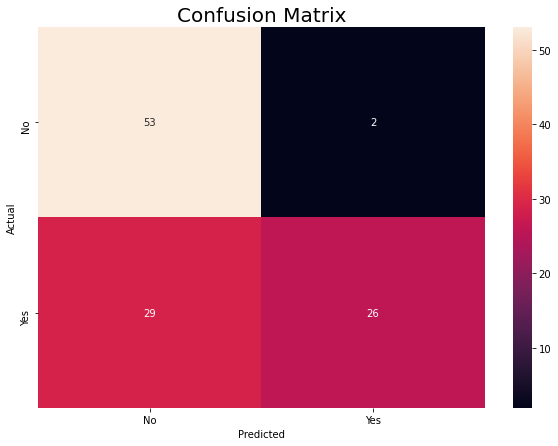

In [10]:
actual_data = list(actual_class)
y_actu = pd.Series(actual_data, name='Actual')
y_pred = pd.Series(guess_class, name='Predicted')
df_confusion = pd.crosstab(y_actu, y_pred)
plt.figure(figsize = (10,7))
plt.title('Confusion Matrix', fontsize = 20)
sn.heatmap(df_confusion, annot=True)
plt.show()

In [11]:
true_positive = 0
true_negative = 0
false_positive = 0
false_negative = 0

for a in range(len(guess_class)):
    if guess_class[a] == actual_class[a] and guess_class[a] == "Yes":
        true_positive += 1
    elif guess_class[a] == actual_class[a] and guess_class[a] == "No":
        true_negative += 1
    elif guess_class[a] != actual_class[a] and guess_class[a] == "Yes":
        false_positive += 1
    elif guess_class[a] != actual_class[a] and guess_class[a] == "No":
        false_negative += 1
print("True Positives:", true_positive)
print("True Negatives:", true_negative)
print("False Positives:", false_positive)
print("False Negatives:", false_negative)

True Positives: 26
True Negatives: 53
False Positives: 2
False Negatives: 29


In [12]:
print("Accuracy:", (true_positive + true_negative)/(true_positive + true_negative + false_positive + false_negative) * 100, "%")

precision = true_positive/(true_positive + false_positive)
print("Precision:", precision * 100, "%")

recall = true_positive/(true_positive + false_negative)
print("Recall:", recall * 100, "%")

print("F1 Score:", 2*precision*recall / (precision + recall))

Accuracy: 71.81818181818181 %
Precision: 92.85714285714286 %
Recall: 47.27272727272727 %
F1 Score: 0.6265060240963856
